In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bsp
import matplotlib
import matplotlib.pyplot as plt
import sqlite3
import re
from datetime import datetime, timedelta,date
import sys

In [7]:
url = 'https://search.naver.com/search.naver?sm=tab_sug.top&where=news&query={0}&start={1}'.format('아모레퍼시픽',11)
cookies = {"cookies" : "news_office_checked=1016"}
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36"}
url

'https://search.naver.com/search.naver?sm=tab_sug.top&where=news&query=아모레퍼시픽&start=11'

<!DOCTYPE doctype html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="아모레퍼시픽 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'아모레퍼시픽'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'아모레퍼시픽'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>아모레퍼시픽 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210311.css" rel="stylesheet" type="text/css"/> <link href="https://ssl
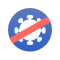
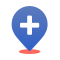
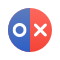
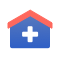

In [8]:
res = requests.get(url,headers=headers,cookies=cookies)    
src = res.content.strip()
htmls = bsp(src,'html.parser')
htmls

In [77]:
tgts = htmls.select('ul.list_news > li.bx')
tgts


[]

In [78]:
for tgt in tgts:
    print(tgt)
    print('-'*10)
    

In [24]:
for tgt in tgts :
    #print(tgt)
    #print('-'*30)
    amtitle = tgt.select('a.news_tit')[0].text
    amcontent = tgt.select('a.api_txt_lines')[0].text
    

In [26]:
print(amtitle,amcontent)

아모레퍼시픽그룹, 18년간 2200t 공병 수거… ESG 경영 선도 뉴데일리 김보라 기자 = 아모레퍼시픽그룹은 2003년 ‘이니스프리 공병 수거 캠페인’을 시작으로 2020년까지 전국 아모레퍼시픽그룹 매장에서 2200톤의 화장품 공병을 수거했다고 18일 밝혔다. 누적 참여인원은...


--------------------------------------------------------------------------------------------

In [67]:
url = 'http://biz.heraldcorp.com/search/index.php?q=아모레퍼시픽&sort=1&np=3'
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36"}
url

'http://biz.heraldcorp.com/search/index.php?q=아모레퍼시픽&sort=1&np=3'

In [68]:
res = requests.get(url,headers=headers)    
src = res.content.strip()
htmls = bsp(src,'html.parser')
htmls

<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="3bff77e7a90aacc9e6d7846530031d37f40251c7" name="naver-site-verification">
<title> 헤럴드경제</title>
<meta content=" 헤럴드경제" name="title"/>
<meta content="헤럴드경제, 헤경" name="news_keywords"/>
<meta content="Re-imagine! Life beyond Media, 투자/경제/정치/오피니언/부동산/재테크 뉴스 컨텐츠 생산" name="description">
<meta content="헤럴드경제, 헤경, heraldcorp , 경제지, 신문, 뉴스, 보도, 속보, 정치, 경제, 사회, 국제, 문화, 사설, 컬럼, News, Newspaper, Korea, South Korea, Rep.Korea" name="keywords"/>
<link href="http://mbiz.heraldcorp.com/search/index.php?q=%EC%95%84%EB%AA%A8%EB%A0%88%ED%8D%BC%EC%8B%9C%ED%94%BD&amp;sort=1&amp;np=3" media="only screen and (max-width: 640px)" rel="alternate"/>
<link href="http://mbiz.heraldcorp.com/search/index.php?q=%EC%95%84%EB%AA%A8%EB%A0%88%ED%8D%BC%EC%8B%9C%ED%94%BD&amp;sort=1&amp;np=3" media="handheld" rel="alternate"/><meta content

In [97]:
tgts = htmls.select('div.list_title')
for i in tgts:
    print(i.text)
    #print('-'*10)
#tgts[0]

아모레퍼시픽, 보통주 800원·우선주 805원 현금배당 결정
S-Oil(010950), 52주 신고가
‘상의 새 수장’ 최태원 “망설임 끝에 중책…견마지로 다 하겠다”
코로나에도 K-뷰티 수출선방…왜?
중국 ‘럭셔리’, 동남아 ‘한류’…K-뷰티 순항하는 이유는?[언박싱]
2월 18일 기관 순매수 상위 종목(거래소) KODEX 200선물인버스2·신세계·SK이노베
“100만원으로 30억 스타트업 창업 성공”
용산구, 이태원 일대 공중화장실 환경 개선
대만 쇼피-아모레퍼시픽, K-뷰티 파트너십 MOU
S-Oil, 52주 신고가


In [80]:
tit = tgts.select('li > div.list_title')[0].text

IndexError: list index out of range

In [56]:
for tgt in tgts:
    amotitle = tgt.select('li .article_title')[0].text

IndexError: list index out of range

In [44]:
print(amotitle)

NameError: name 'amotitle' is not defined